# Predicting Income Levels from Census Data

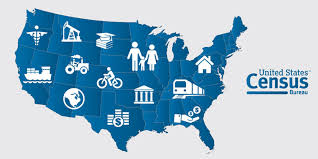

## Part 1: Project Introduction

###Project Requirements

For this project, we will need to propose a problem that we are going to solve for a made-up
client using machine learning techniques. We will need to propose at least three machine learning
models that we will need to compare as a potential solution for this problem.

### Instructions To Run

To run this project on Google Collab, you should be able to simply run the entire file by selecting the `Runtime` button and selecting `Run all` button. Alternatively, you can set up a local environment where you install all the necessary packages and run it on your local machine.

### Background

The ["Adult" dataset](https://archive.ics.uci.edu/dataset/2/adult), commonly referred to as the "census income" dataset, is a renowned resource in the machine learning community. It comprises demographic and employment information from the U.S. census bureau, aimed at predicting whether an individual earns more than $50,000 annually. This dataset includes a mix of categorical and numerical attributes such as age, work class, education, marital status, occupation, and hours per week, making it an excellent candidate for practicing binary classification techniques.

### Motivation

The motivation behind using the Adult dataset for a machine learning project is twofold. First, it addresses a real-world problem that can aid in socioeconomic studies, policy making, and targeted marketing. Second, it offers a rich dataset that requires a comprehensive set of machine learning practices to tackle, including data preprocessing, model selection, and performance evaluation. This project not only helps in refining predictive modeling skills but also in understanding the intricacies involved in handling datasets that reflect real-world scenarios. Additionally, as young adults entering the workforce, this analysis provides valuable insights into the determinants of income levels, enhancing our understanding of how various factors influence earning potential.



### Project Approach

As per our email conversation with Dr. Dawson, the project follows a similar approach to our assignments and as such, this Jupyter Notebook has a nearly identical outline to our previous assignments.

The project involves several key steps, starting from a thorough understanding of the dataset to deploying a predictive model. The data preprocessing phase includes handling missing values, encoding categorical variables, scaling features, and possibly feature engineering to enhance model performance. Following preprocessing, the dataset is split into training and testing sets.

We compare three machine learning models: Logistic Regression,KNeighborsClassifier, and SVC. These models are selected based on their ability to handle binary classification tasks effectively and their varying degrees of complexity and interpretability.

To streamline the experimentation process, pipelines are created for each model to encapsulate data preprocessing and modeling steps. This approach facilitates easy experimentation with different model configurations and hyperparameters. Model performance is evaluated using metrics suitable for classification tasks, such as accuracy, precision, recall, and F1 score.

Visualization plays a crucial role throughout the project, from initial data exploration to comparing model performances. Understanding the distribution of features, the relationship between variables, and the importance of different features for the predictive task are all critical for gaining insights into the dataset and the models' behaviors.



### Data Source

The Adult dataset is publicly available and can be accessed from repositories like the UCI Machine Learning Repository or through this link https://archive.ics.uci.edu/dataset/2/adult. It has been widely used for research and educational purposes in the machine learning community.



### Conclusion

This project exemplifies the end-to-end process of applying machine learning to a practical problem. It underscores the importance of meticulous data preprocessing, the strategic selection of models, and the insightful analysis of model performance through visualization. Through this project, we aim to predict income levels from census data with high cross validation scores, providing valuable insights into the factors that most significantly influence an individual's earning potential.

## Part 2: Classification

### 2.1: Load Data
For this project, we will be using the UC Irvine ML Repository Adult dataset. This dataset uses various demographic and personal characteristics of individuals to predict whether or not the individual makes over 50K a year.

More information on the dataset can be found here:
https://archive.ics.uci.edu/dataset/2/adult

In [ ]:
# Install UC Irvine ML Repository which contains the Adult Dataset
!pip install ucimlrepo

In [ ]:
# Import Necessary Libraries

# Core ML Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Plot the graphs
import seaborn as sns # Extension on Matplotlib

# Sci-Kit Learn Libraries
from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import RandomForestRegressor

!pip install mglearn
import mglearn

#### Prepare the feature matrix and target vector

Using the UC Irvine Repository `fetch_ucirepo()` function, load the Adult data set into feature matrix `X` and target vector `y`

In [ ]:
# Load the dataset
from ucimlrepo import fetch_ucirepo

# Fetch dataset
adult = fetch_ucirepo(name='Adult')

# Load data (as pandas dataframes) into Feature Matrix X and Target Vector Y.
X = adult.data.features
y = adult.data.targets

# First, create a combined DataFrame
data = pd.concat([X, y], axis=1)

# Sample the combined DataFrame (Choosing 2% of the entire dataset [which has over 48K records])
data_sampled = data.sample(frac=0.02, random_state=0)

### 2.2 Data Cleaning and Preprocessing

We observed that the dataset should contain only two unique values for the target (">50K", "<=50K"), yet it includes four. The discrepancy lies within the target column, where an additional period "." appended to some entries creates apparent uniqueness, such as ">50K." and "<=50K.", which should not be distinct from ">50K" and "<=50K".

Additionally, we conducted a null value check and subsequently removed all records containing null values from the dataset.

In [ ]:
data_sampled

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
38113,41,Private,151856,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K.
39214,57,Self-emp-not-inc,87584,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,25,United-States,<=50K.
44248,31,Local-gov,220669,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,6849,0,40,United-States,<=50K.
10283,55,Private,171355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,20,United-States,<=50K
26724,59,Self-emp-not-inc,148626,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23980,70,?,149040,HS-grad,9,Widowed,?,Not-in-family,White,Female,2964,0,12,United-States,<=50K
46284,23,Private,265077,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,1055,0,10,United-States,<=50K.
27780,38,Private,287701,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
7648,53,Private,177727,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
# Check for null values
X_missing_values_count = X.isnull().sum() # check total number of nulls across all columns in feature matrix

y_missing_values_count = y.isnull().sum() # check total number of nulls across the target matrix

print("X Missing values count:", X_missing_values_count)
print("y Missing values count:", y_missing_values_count)

X Missing values count: age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64
y Missing values count: income    0
dtype: int64


In [ ]:
# Drop all records with null values
data_sampled = data_sampled.dropna()

# Separate the sampled DataFrame back into X and y
X = data_sampled.drop(y.columns, axis=1)
y = data_sampled[y.columns]

# Clean values with a period (Note: This converts y from dataframe to series data type)
y = y['income'].str.replace(r'\.', '', regex=True)

# Print Metadata, Variable Information, Shape of X and y
print(f"Metadata:\n{adult.metadata}\n----")
print(f"Variable Information:\n{adult.variables}\n----")
print(f"X:\nShape: {X.shape}")
print(f"y:\nShape: {y.shape}\n---")

Metadata:
{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditi

In [ ]:
X.head() # View what the feature matrix looks like/ensure data properly loaded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
38113,41,Private,151856,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
39214,57,Self-emp-not-inc,87584,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,25,United-States
44248,31,Local-gov,220669,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,6849,0,40,United-States
10283,55,Private,171355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,20,United-States
26724,59,Self-emp-not-inc,148626,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [ ]:
# Convert the Series back to a DataFrame
y = y.to_frame(name='income')

In [ ]:
y.head() # View what the target vector looks like/ensure data properly loaded

,income
38113,<=50K
39214,<=50K
44248,<=50K
10283,<=50K
26724,<=50K


In [ ]:
#Drop column because too many unique values and dataset does not encompass all unique data. Gives a value unrecognized error if handle_unknown=ignore is not set.
X = X.drop('native-country', axis=1)

In [ ]:
# Print # of unique values per feature
for feature in X:
  print(f"Feature: {feature} | Number of Unique Values: {len(X[feature].unique())}")

# Print # of unique values for target (classification decisions)
print(f"\ny: income | Number of Unique Values: {len(y['income'].unique())}")
print(f"y Unique Values: {y['income'].unique()}")

Feature: age | Number of Unique Values: 67
Feature: workclass | Number of Unique Values: 8
Feature: fnlwgt | Number of Unique Values: 950
Feature: education | Number of Unique Values: 16
Feature: education-num | Number of Unique Values: 16
Feature: marital-status | Number of Unique Values: 6
Feature: occupation | Number of Unique Values: 14
Feature: relationship | Number of Unique Values: 6
Feature: race | Number of Unique Values: 5
Feature: sex | Number of Unique Values: 2
Feature: capital-gain | Number of Unique Values: 41
Feature: capital-loss | Number of Unique Values: 26
Feature: hours-per-week | Number of Unique Values: 56

y: income | Number of Unique Values: 2
y Unique Values: ['<=50K' '>50K']


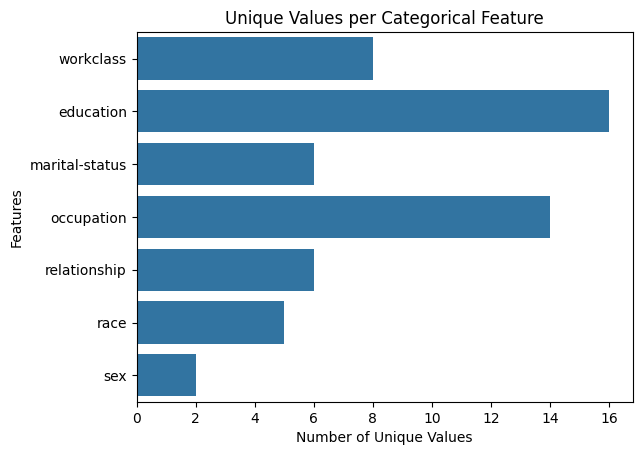

In [ ]:
# Filter to include only categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Visualization of unique values per categorical feature in X
sns.barplot(x=X[categorical_columns].nunique(), y=categorical_columns)
plt.title('Unique Values per Categorical Feature')
plt.xlabel('Number of Unique Values')
plt.ylabel('Features')
plt.show()

What are the column data types?

In [ ]:
print(X.dtypes)
print(y.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
dtype: object
income    object
dtype: object


In [ ]:
# Checking the different unique values for a sample column
unique_values = X['marital-status'].unique()

# To print the unique values
print(unique_values)

['Married-civ-spouse' 'Divorced' 'Never-married' 'Widowed' 'Separated'
 'Married-spouse-absent']


#### Encoding/Scaling

Additionally, the target vector is of binary type but needs to be converted to 1s and 0s.

In [ ]:
# Initialize `LabelEncoder` from `sklearn.preprocessing` and apply it to encode the `y['income']` column,
# converting categories '<=50K' and '>50K' into numerical values `0` and `1`, respectively, stored in `y_encoded`.
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Fit and transform the target variable
y_encoded = encoder.fit_transform(y['income'])

# y_encoded now contains 0 and 1 corresponding to '<=50K' and '>50K'

Moving on to the next step. In this dataset, most features are categorical, so they need to be encoded. We will use `OneHotEncoder(sparse_output=False)` for this case. Some features are numerical so we will use `StandardScaler()` for this case.

In [ ]:
# Initialize a ColumnTransformer to apply different preprocessing to different columns:
ct = ColumnTransformer(
    [
        # Apply StandardScaler to all columns that are not of object type (i.e., numerical columns)
        # for scaling them to a standard scale.
        ("scaling", StandardScaler(), make_column_selector(dtype_exclude=object)),

        # Apply OneHotEncoder to all object type columns (i.e., categorical columns) to convert
        # them into one-hot encoded vectors. The `sparse_output=False` ensures the output is a dense array.
        # `handle_unknown='ignore'` allows the encoder to handle any unseen categories in the test data
        # by ignoring them rather than throwing an error.
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), make_column_selector(dtype_include=object))
    ])

The next step is to build a pipleine to combine the coding with the selected Machine Learning method. To initalize the pipeline, we will use `LogisticRegression(max_iter=3500)` as a placeholder.

The value of max_iter=3500 for the Logistic Regression classifier was established through an empirical process, where different iteration counts were systematically evaluated. This approach involved running the model multiple times, each with a distinct max_iter value, to observe the effect on the model's convergence and performance metrics. The aim was to find a balance between computational efficiency and model accuracy, ensuring that the algorithm had sufficient iterations to converge on the best solution without unnecessarily extending processing time.

In [ ]:
# Define a pipeline that first preprocesses data with Column Transformer and then applies Logistic Regression as the classifier.
pipe = Pipeline(steps=[('preprocessor', ct),
                      ('classifier', LogisticRegression(max_iter=3500))])

In [ ]:
set_config(display='diagram')
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b1023ddd6f0>),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b1023dde5c0>)])),
                ('classifier', LogisticRegression(max_iter=3500))])

### 2.3 Data Splitting

Split data into training and test sets.

In [ ]:
# Split the data into training and testing sets, ensuring an even distribution of classes with stratification and a fixed random state for reproducibility.
# Have a 80/20 split for training/testing as is standard.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=0)

### 2.4 Model Selection

This parameter grid is prepared for a grid search, specifying configurations for tuning three different classifiers: Logistic Regression, K-Nearest Neighbors, and Support Vector Classifier. Each classifier has its set of parameters to explore, including regularization strength (`C`), penalty type, solver for Logistic Regression, number of neighbors for K-Nearest Neighbors, and kernel type for Support Vector Classifier.

In [ ]:
# TODO: Build a parameter grid
param_grid = [
    {
        "classifier": [LogisticRegression(max_iter=3500)],
        "classifier__C": [0.1, 1, 10],
        "classifier__penalty": ["l1"],  # Use 'l1' penalty
        "classifier__solver": ["liblinear", "saga"],  # Choose an appropriate solver
    },
    {
        "classifier": [KNeighborsClassifier()],
        "classifier__n_neighbors": [3, 5, 7],
    },
    {
        "classifier": [SVC()],
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ["linear", "rbf"],
    },
]

In [ ]:
# Implement grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)

In [ ]:
# Print the results from the grid search
grid_search.fit(X_train, y_train)

print("Best Parameters:\n{}\n".format(grid_search.best_params_))
print("Best Cross-Validation Train Score: {:.2f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Cross-Validation Test Score: {:.2f}".format(grid_search.best_score_))
print("Test-set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best Parameters:
{'classifier': SVC(C=1), 'classifier__C': 1, 'classifier__kernel': 'rbf'}

Best Cross-Validation Train Score: 0.89
Best Cross-Validation Test Score: 0.86
Test-set score: 0.86


In [ ]:
results = grid_search.cv_results_

# Example: Extract mean test scores and parameters
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(mean_score, params)

0.8500551735845854 {'classifier': LogisticRegression(max_iter=3500), 'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.8513708513708513 {'classifier': LogisticRegression(max_iter=3500), 'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
0.8540022069433834 {'classifier': LogisticRegression(max_iter=3500), 'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.8526950174008997 {'classifier': LogisticRegression(max_iter=3500), 'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
0.8475256769374416 {'classifier': LogisticRegression(max_iter=3500), 'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.8501230795348442 {'classifier': LogisticRegression(max_iter=3500), 'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
0.8174603174603176 {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 3}
0.8

###2.5 Visualization & Analysis

#### Visualize Grid Search Results

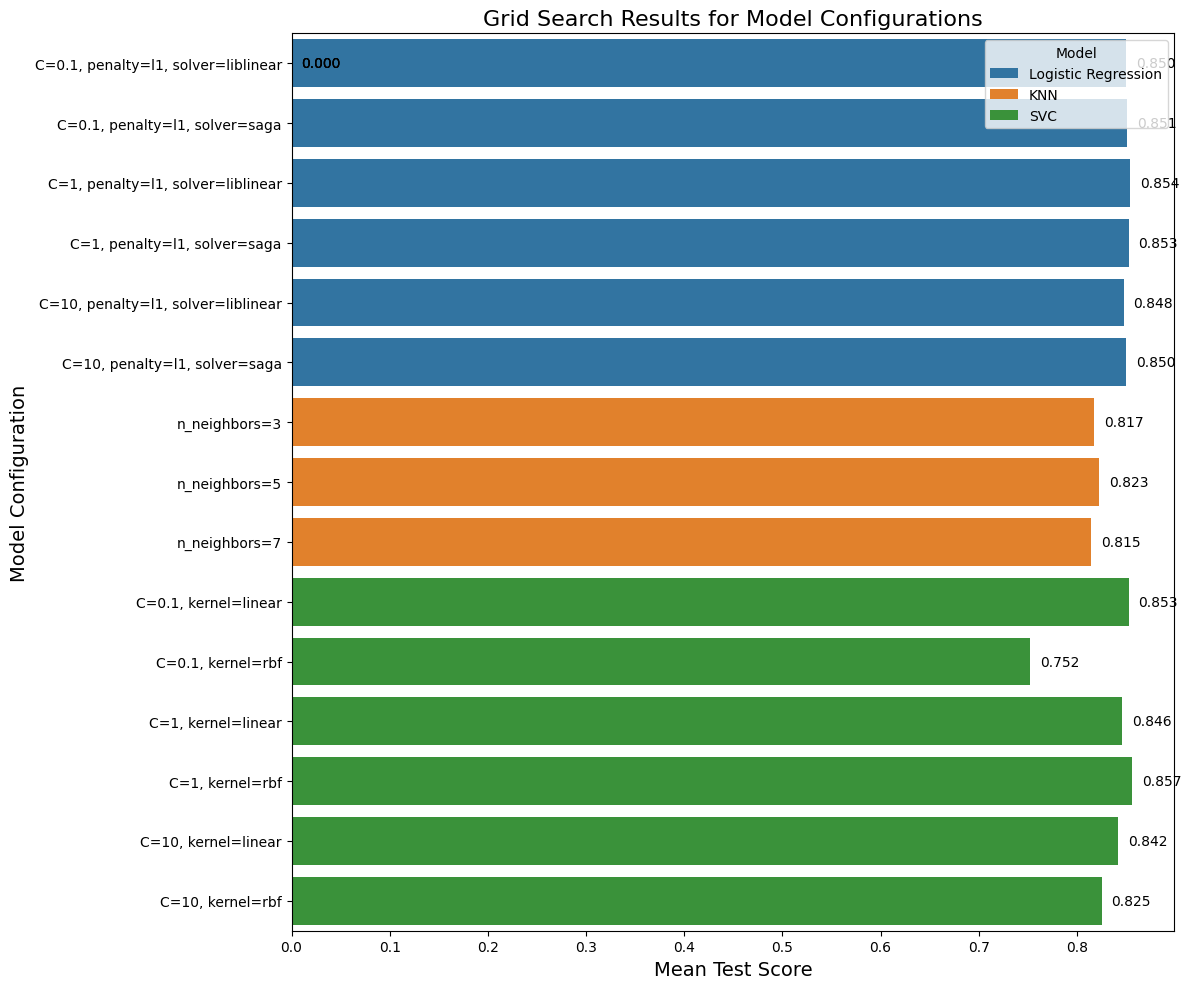

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Given results, create a DataFrame for visualization
results = [
    (0.8500551735845854, 'Logistic Regression', 'C=0.1, penalty=l1, solver=liblinear'),
    (0.8513708513708513, 'Logistic Regression', 'C=0.1, penalty=l1, solver=saga'),
    (0.8540022069433834, 'Logistic Regression', 'C=1, penalty=l1, solver=liblinear'),
    (0.8526950174008997, 'Logistic Regression', 'C=1, penalty=l1, solver=saga'),
    (0.8475256769374416, 'Logistic Regression', 'C=10, penalty=l1, solver=liblinear'),
    (0.8501230795348442, 'Logistic Regression', 'C=10, penalty=l1, solver=saga'),
    (0.8174603174603176, 'KNN', 'n_neighbors=3'),
    (0.8226636108989052, 'KNN', 'n_neighbors=5'),
    (0.8148374501315677, 'KNN', 'n_neighbors=7'),
    (0.8526950174008997, 'SVC', 'C=0.1, kernel=linear'),
    (0.7522790934555641, 'SVC', 'C=0.1, kernel=rbf'),
    (0.846193022663611, 'SVC', 'C=1, kernel=linear'),
    (0.8565826330532212, 'SVC', 'C=1, kernel=rbf'),
    (0.84227145403616, 'SVC', 'C=10, kernel=linear'),
    (0.825294966471437, 'SVC', 'C=10, kernel=rbf')
]

df_results = pd.DataFrame(results, columns=['Mean Test Score', 'Model', 'Configuration'])

# Plotting all results with Seaborn's barplot
plt.figure(figsize=(12, 10))
barplot = sns.barplot(x='Mean Test Score', y='Configuration', hue='Model', data=df_results, dodge=False)

# Improve the aesthetics
plt.title('Grid Search Results for Model Configurations', fontsize=16)
plt.xlabel('Mean Test Score', fontsize=14)
plt.ylabel('Model Configuration', fontsize=14)
plt.legend(title='Model')

# Annotate the mean test scores on top of the bars for better readability
for p in barplot.patches:
    width = p.get_width()
    plt.text(p.get_x() + width + 0.01, p.get_y() + p.get_height() / 2,
             '{:1.3f}'.format(p.get_width()), ha='left', va='center')

plt.tight_layout()
plt.show()

#### Confusion Matrix

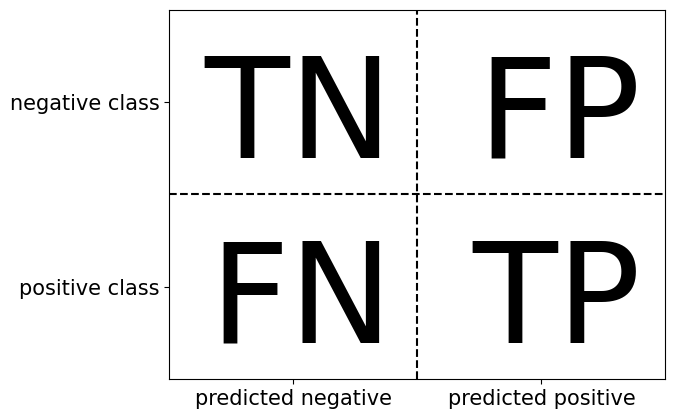

In [ ]:
# Recall a Confusion Matrix follows the following format:
mglearn.plots.plot_binary_confusion_matrix()
plt.show()

In [ ]:
# Find the prediction labels or scores to be used for Confusion Matrix below
y_pred = grid_search.predict(X_test)

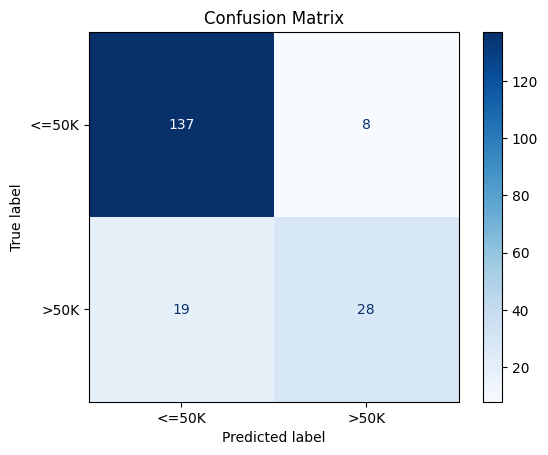

In [ ]:
# Assuming y_test is your true labels and y_pred is the predicted labels from one of your models
# Calculate confusion matrix for one model as an example
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tick_labels = ['<=50K', '>50K']

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tick_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


#### Visualize Classification Report (Classification Metrics)



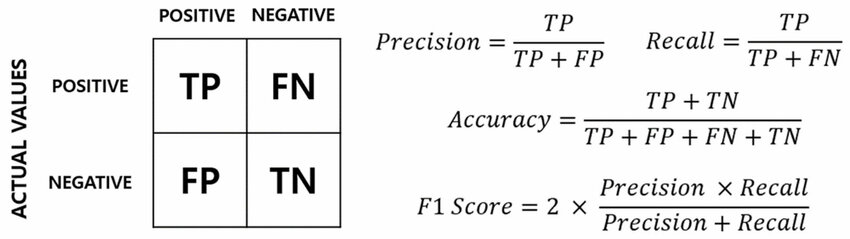

3. Common Classification Metrics:
Here are some common classification metrics:

> Accuracy:
> Accuracy is the ratio of correctly predicted instances to the total instances in the dataset.

> Precision:
> Precision is the ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of the positive predictions made by the model. Precision focuses on the predicted positive instances and indicates how many of them are actually relevant. A high precision value means that the model has fewer false positives.

> Recall:
> Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It measures the ability of the model to capture all the relevant instances of the positive class. Recall is sensitive to false negatives, so a high recall value indicates that the model is good at identifying positive instances, but it may have more false positives.

> F1-Score:
> The F1-Score is the harmonic mean of precision and recall and is especially useful when you want to balance precision and recall.


In [ ]:
print(classification_report(y_test, y_pred,
                            target_names=tick_labels,
                           zero_division=0))
# Provides the accuracy, macro average provides the average across classes
# Weighted average is average of the weights

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91       145
        >50K       0.78      0.60      0.67        47

    accuracy                           0.86       192
   macro avg       0.83      0.77      0.79       192
weighted avg       0.85      0.86      0.85       192



## Part 3: Observations/Interpretation


1. To find which model and parameters produced the best results, we utilized `GridSearchCV` like in previous assignments, which ran and cross-checked all three models and different parameter combinations on the dataset. As can be seen above the best model between `Logistic Regression`, `KNN Classifier` and `SVC` classification models is the `SVC` model. The parameter fed into the `GridSearchCV` for `SVC` were C which is the regularization parameter and inverstely proportional to it or proportional to model complexity. The other model parameter was the kernel type being used in the algorithm. The `SVC` model parameters that produced the best results were `C=1` and a `rbf kernel`. This means the model did not need more complexity as the default value of C (1) and default kernel (rbf) produced the best results.

2. The model was a good fit as reflected in the cross-validation training/testing score and test-set score/accuracy. With a cross-validation training score of `89%`, a cross-validation testing score of `86%` and a test-set score or accuracy of `86%`, the model is evidently a good fit and clearly a well-fit model. Since the training score and validation score are close to each other and the training score is relatively close to the max score of 1, this model has low bias and low variance. Therefore, the model is a good fit for the provided data and therefore is not too simple or too complex. Please do note we only use 2% of the dataset as using the entire dataset was very computationally intensive and would take a long time (did not complete even after 4 hours of running).

3. Under `2.5. Visualizations & Analysis`, we first visualize the grid search results. We can visually see that `SVC(C=1)` was the best performing model with the `LogisticRegression()` being a close second with a mean test score of 85.66% and 85.40% respectively. We also plot the confusion matrix where we see that we have 137 TN, 8 FP, 19 FN, 28 TP. This indicates that 137 people that actually made <=50K in income were predicted to make <=50K and 8 people that made <=50K in income were predicted to make >50K. It also indicates that 19 people that actually made >50K in income were predicted to make <=50K and 28 people that made >50K in income were predicted to make >50K. Finally, we log the classification report of this best-performing model. It shows how we have better precision, recall and f1-score when it comes to people with <=50K than >50K. This can be attributed to the fact that we only took a fraction of the dataset due to it being too computationally intensive to use the whole dataset and the fraction having more people with <=50K income. Nonetheless, the model is a good fit for the dataset and using the entire dataset would only make the model an even better fit.

### Process Description



1.
   We primarily sourced our code from the provided course content. This includes all the lecture slides, the labs and most prominently the code examples and assignments. We initially reviewed all the course content as part of our regular course review process. We then either remembered the code snippets from our review session or referred again to the code examples to figure out how to perform a certain task in the final project. In addition, we referred to our past assignments as there was a lot of similaritity in the code written. Finally, we also referred to the [dataset documentation](https://archive.ics.uci.edu/dataset/2/adult) to figure out how to import the data. We also referred to the [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

2.
   We completed the project in chronological order. Though we did have to come back to the Data Pre-Processing step multiple times to clean the data so that it can be properly trained and classified.

3.
   We did not use generative AI as we were able to find all the necessary code from class code examples, documentation and the course assignments.
   
4.
   Given that this final project was very similar to the previous assignments, we had far fewer challenges or struggles in this final project. Our first and only challenge was when we were not sure how to properly process the data from the dataset. To tackle this challenge we simply referred to code examples to see how it was done in the provided code examples and our labs. In addition, I refered to the above documentation link to better understand what it is and how to use it. In addition, we would utilize the error messages from attempting to train the model to further process the data. Apart from these struggles, we did not have any other challenges, thanks to reviewing the course content before the assignment and having the course content readily available to refer to while working on this assignment.

# Contributors

1. Mohammad Mahtab Khan
2. Redwanul Islam